In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))


from simulation import (params_base, state_base, compute_starting_total_length, check_d_probability, post_processing_function,
                        percent_ending_in_d_metric, average_d_count_metric, plot_length_experiment_simulation, plot_d_count_experiment_simulation,
                        experiments_map)
from IPython.display import display, Markdown
from math_spec_mapping import load_from_json, write_initial_state_variables_tables, write_parameter_table_markdown

# For development purposes
"""sys.path.append(os.path.abspath('../..'))
from MSML.src.math_spec_mapping import (load_from_json, write_initial_state_variables_tables, write_parameter_table_markdown)"""

from copy import deepcopy
from src import math_spec_json

ms = load_from_json(deepcopy(math_spec_json))

experiment_names = ["Baseline", "Control Option V2 Low D Probability", "Control Option V2 High D Probability"]
experiments = [experiments_map[x] for x in experiment_names]


df, metrics, state_l, params_l = ms.run_experiments(experiments,
                    params_base,
                    state_base,
                    post_processing_function,
                    state_preperation_functions=[compute_starting_total_length],
                    parameter_preperation_functions=[check_d_probability],
                    metrics_functions=[percent_ending_in_d_metric,
                                        average_d_count_metric,
                                        ])

Add spec path to load_from_json to load spec tree and allow linking to the code in Obsidian


In [2]:
table1 = write_initial_state_variables_tables(ms, initial_values=state_base)
table2 = write_parameter_table_markdown(ms, initial_values=params_base)

display(Markdown("# Baseline State"))
display(Markdown(table1))
display(Markdown("# Baseline Parameters"))
display(Markdown(table2))

# Baseline State

### Global State

| Name | Description | Type | Symbol | Domain | Initial Value |
| --- | --- | --- | --- | --- | --- |
|Dummy|The dummy entity|Entity Type||| {'Words': '', 'Total Length': None} |
|Time|The clock time|DUMMY Integer Type||| 0 |
|Simulation Log|The simulation log holding historical data|Simulation Log Type||| [] |

### DUMMY State

| Name | Description | Type | Symbol | Domain |
| --- | --- | --- | --- | --- |
|Words|All words that were created|DUMMY ABCDEF Type|||
|Total Length|The total length of words * multiplier|DUMMY Integer Type|||



# Baseline Parameters

| Name | Description | Parameter Class | Symbol | Domain | Initial Value |
| --- | --- | --- | --- | --- | --- |
|DUMMY D Probability|The probability that D is chosen|Behavioral||[0, 1]| 0.5 |
|DUMMY Length Multiplier|A multiplier to multiply into length calculations|System||$\mathbb{Z}$| 3 |


In [3]:
print(df.head(5))
print()
print()
print(metrics)
print()
print()
print(metrics.groupby("Experiment").mean().drop(columns=['Monte Carlo Run']))

   Time    Word  Length (Multiplied)  Length (Nominal)  D Count  \
0     0                            0               0.0      NaN   
1     1      AA                    6               2.0      0.0   
2     2     AAB                    9               3.0      0.0   
3     3   AABCA                   15               5.0      0.0   
4     4  AABCAB                   18               6.0      0.0   

   Monte Carlo Run Experiment  
0                1   Baseline  
1                1   Baseline  
2                1   Baseline  
3                1   Baseline  
4                1   Baseline  


                                       Percent Ending in D Average D Count  \
Baseline-1                                            0.08            1.22   
Baseline-2                                            0.06            1.14   
Baseline-3                                             0.1            1.36   
Baseline-4                                            0.06            1.08   
Baseline-5   

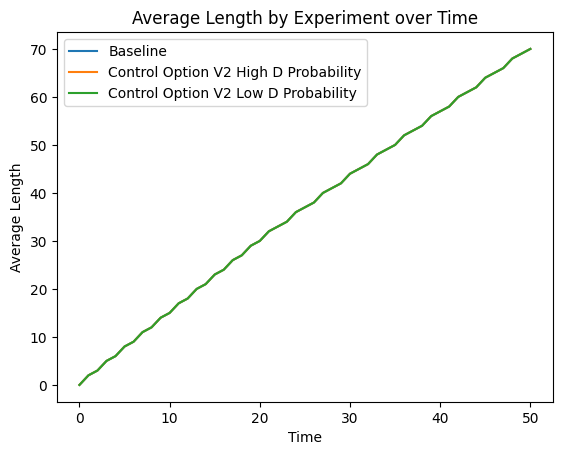

In [4]:
plot_length_experiment_simulation(df)

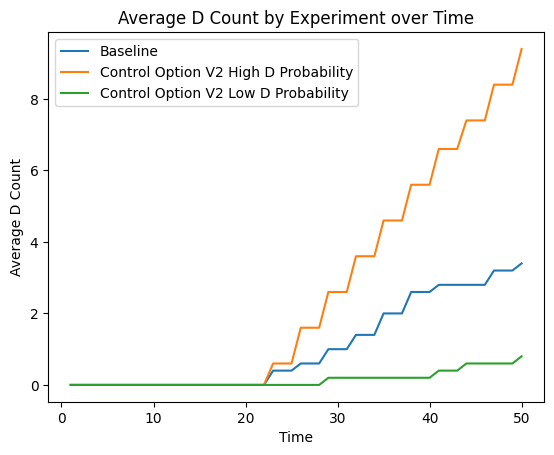

In [5]:
plot_d_count_experiment_simulation(df)